In [1]:
import pandas as pd
import glob

# Procesamiento de datos

In [3]:
resultados=pd.read_csv("data/GPT3_salida/resultados.csv")
resultados

,Unnamed: 0,0,1
0,0,data/GPT3/2/paraphraseGPT2.csv,"[0.5037907958030701, 0.9595375657081604]"
1,1,data/GPT3/1/new_paraphrase.csv,"[1.1499496698379517, 0.3179190754890442]"


In [4]:
resultados=resultados.assign(grupo=0.0)
resultados=resultados.assign(error=0.0)
resultados=resultados.assign(accuracy=0.0)

In [5]:
resultados

,Unnamed: 0,0,1,grupo,error,accuracy
0,0,data/GPT3/2/paraphraseGPT2.csv,"[0.5037907958030701, 0.9595375657081604]",0.0,0.0,0.0
1,1,data/GPT3/1/new_paraphrase.csv,"[1.1499496698379517, 0.3179190754890442]",0.0,0.0,0.0


In [7]:
temp=resultados.copy()
grupos=["GPT2","GPT3"]
i=0
for index,strings in temp.iterrows():
    resultados.at[index,'grupo']=grupos[i]
    resultados.at[index,'error']=float(strings[2].split(',')[0][1:])
    resultados.at[index,'accuracy']=float(strings[2].split(',')[1][:-1])
    i+=1
resultados

,Unnamed: 0,0,1,grupo,error,accuracy
0,0,data/GPT3/2/paraphraseGPT2.csv,"[0.5037907958030701, 0.9595375657081604]",GPT2,0.503791,0.959538
1,1,data/GPT3/1/new_paraphrase.csv,"[1.1499496698379517, 0.3179190754890442]",GPT3,1.149950,0.317919


array([<AxesSubplot:title={'center':'error'}, xlabel='grupo'>,
       <AxesSubplot:title={'center':'accuracy'}, xlabel='grupo'>],
      dtype=object)

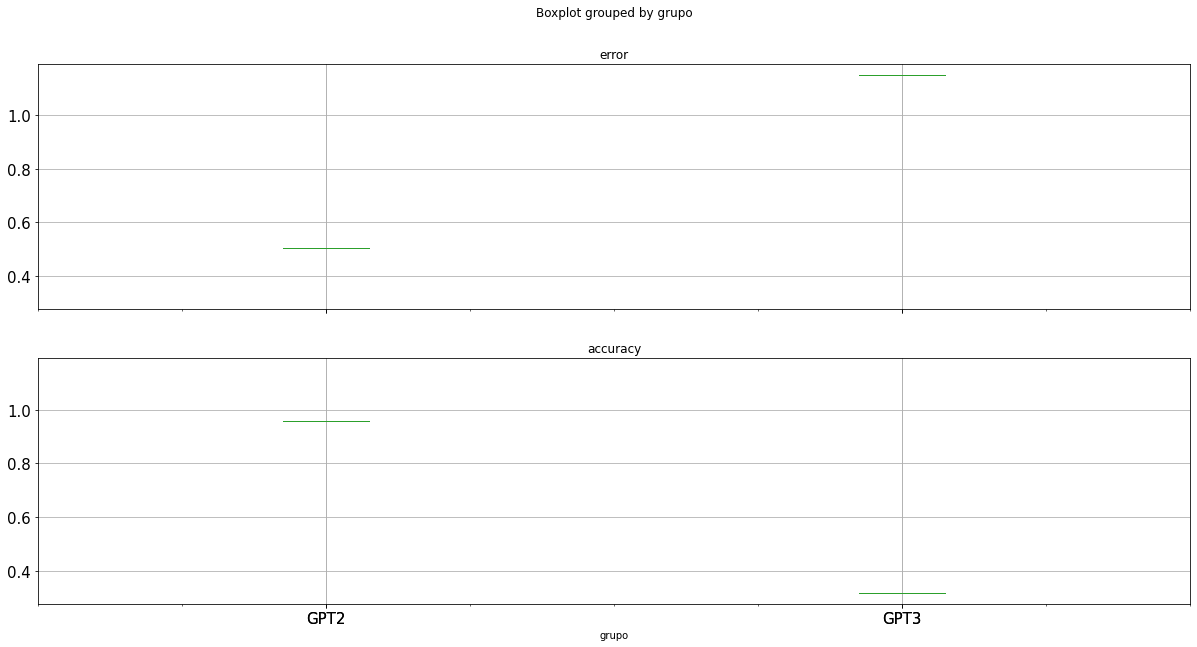

In [8]:
resultados.boxplot(column=['error', 'accuracy'],by='grupo',layout=(2, 1), fontsize=15,figsize=(20,10))
#resultados.boxplot(by='grupo')

<Figure size 720x432 with 0 Axes>

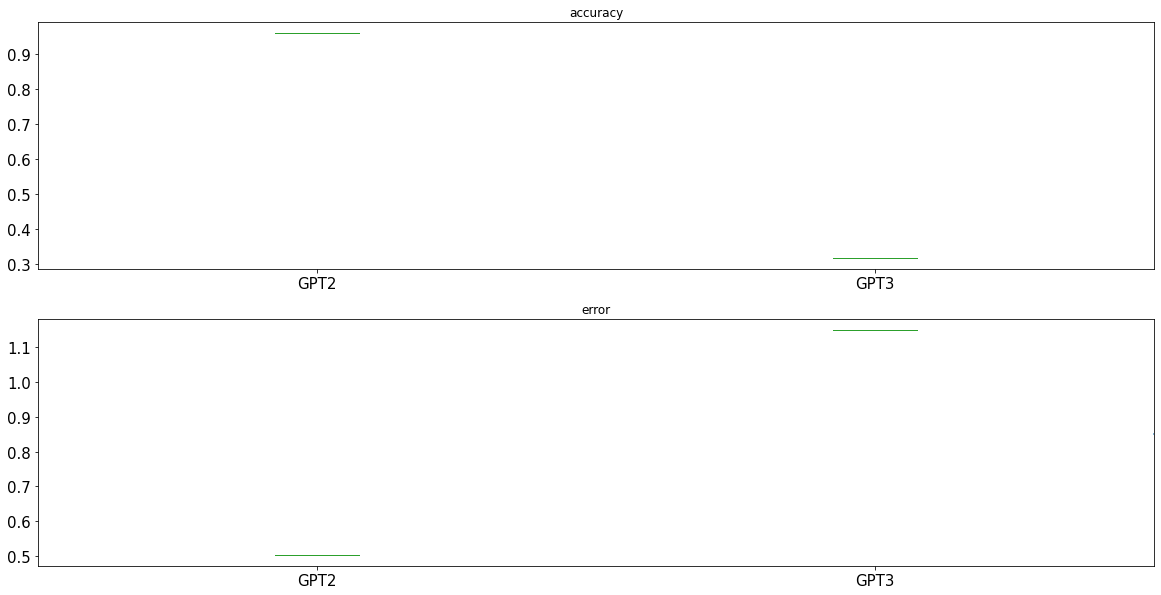

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
resultados.plot(column=['error', 'accuracy'],by='grupo',layout=(2, 1), fontsize=15,figsize=(20,10),subplots=True, 
    sharey=False,kind='box')
plt.axhline(y=0.85073, xmin=1, xmax=100)
plt.subplots_adjust(wspace=0.5)
plt.show()

# Del corpus base vamos a quitar los del test y solo comparar con los de paráfraseo

In [10]:
a=glob.glob('data/GPT3_salida/*.pickle')
a[0]

'data/GPT3_salida/pparaphraseGPT2.csv.pickle'

In [11]:
def mayorEtiqueta(a,b,c):
    if a > b and a > c:
        return 'entailment'
    elif c > a and c > b:
        return 'contradiction'
    else:
        return 'neutral'

In [12]:
f=pd.read_pickle(a[0])
f

,Main index,Text,Hipotesis,R_Text,R_Hip,M_Align,Prediction,Gold_label,Paraphrase,Idx
0,0,"[NULL{null,PROPN}, a{a,DET}, snowboarder{snowb...","[NULL{null,ADJ}, anowmobile{anowmobile,NOUN}, ...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.14382827, 0.03528291, 0.01402...","[0.09497963, 0.77455884, 0.13046147]","[0.0, 1.0, 0.0]",1,67
1,1,"[NULL{null,PROPN}, a{a,DET}, child{child,NOUN}...","[NULL{null,PROPN}, a{a,DET}, pretty{pretty,ADV...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.14292027, 0.1716...","[0.30659798, 0.46114457, 0.23225744]","[0.0, 1.0, 0.0]",1,85
2,2,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, an...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.12843...","[0.005668939, 0.2836572, 0.71067387]","[0.0, 0.0, 1.0]",1,186
3,3,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, in...","[NULL{null,PROPN}, he{-PRON-,PRON}, is{be,VERB...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.17840508, 0.016168319, 0.0352...","[0.43360534, 0.55272824, 0.013666398]","[0.0, 1.0, 0.0]",1,312
4,4,"[NULL{null,ADJ}, island{island,NOUN}, native{n...","[NULL{null,PROPN}, they{-PRON-,PRON}, bothmale...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.13479285, 0.13707395, 0.24858...","[0.18923545, 0.36034042, 0.45042413]","[0.0, 0.0, 1.0]",1,330
...,...,...,...,...,...,...,...,...,...,...
168,168,"[NULL{null,PROPN}, a{a,DET}, woman{woman,NOUN}...","[NULL{null,ADJ}, two{two,NUM}, woman{woman,NOU...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.08687423, 0.17077179, 0.09413...","[0.019005692, 0.36005315, 0.62094116]","[0.0, 0.0, 1.0]",1,9607
169,169,"[NULL{null,PROPN}, a{a,DET}, golden{golden,ADJ...","[NULL{null,PROPN}, a{a,DET}, large{large,ADJ},...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.014024382, 0.084897816, 0.354...","[0.37810364, 0.39856175, 0.2233346]","[0.0, 1.0, 0.0]",1,9654
170,170,"[NULL{null,PROPN}, a{a,DET}, man{man,NOUN}, wi...","[NULL{null,PROPN}, the{the,DET}, family{family...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.004343943, 0.1738117, 0.13922...","[0.0057639335, 0.319975, 0.6742611]","[0.0, 0.0, 1.0]",1,9735
171,171,"[NULL{null,PROPN}, a{a,DET}, white{white,ADJ},...","[NULL{null,ADJ}, theck{theck,NOUN}, kept{keep,...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.016082555, 0.077160776, -0.013421837, 0.00...","[[0.085589595, 0.11239626, 0.101227164, 0.1314...","[0.08208599, 0.27591777, 0.64199626]","[0.0, 0.0, 1.0]",1,9777


# Procesar todos los archivos para obtener las etiquetas originales y las predicciones

In [13]:
# Procesar los archivos obtenidos para procesarlos y tener un nuevo archivo de las etiquetas originales vs etiquetas de predicción
for e in a:
    df_prediction=pd.read_pickle(e)
    temp=df_prediction.copy()
    df_prediction.assign(predicted_label="")
    df_prediction.assign(gold_label="")
    for index,strings in temp.iterrows():
        p_e=mayorEtiqueta(strings['Prediction'][0],strings['Prediction'][1],strings['Prediction'][2])
        g_e=mayorEtiqueta(strings['Gold_label'][0],strings['Gold_label'][1],strings['Gold_label'][2])
        df_prediction.at[index,'predicted_label']=p_e
        df_prediction.at[index,'gold_label']=g_e
    df_prediction.to_pickle(e)

In [14]:
a[0]

'data/GPT3_salida/pparaphraseGPT2.csv.pickle'

# Ya se tiene para todos los muestreos las etiquetas originales vs las predichas

In [22]:
new_data = {'Docs' : [], 'Total' : [], 'Total Entailment' : [], 'Total Entailment (E)' : [],
             'Total Entailment (N)' : [], 'Total Entailment (C)' : [], 'Total Neutral' : [],
             'Total Neutral (N)' : [], 'Total Neutral (E)' : [], 'Total Neutral (C)' : [],
             'Total Contradiction' : [],'Total Contradiction (C)' : [],'Total Contradiction (E)' : [],
             'Total Contradiction (N)' : [], 'grupo': [], 'parafraseo': []}
i=0
for e in a:
    df_predictionP=pd.read_pickle(e)
    
    df_prediction=df_predictionP[df_predictionP["Paraphrase"]==p]
    c_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='entailment')].shape[0]
    cn_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='neutral')].shape[0]
    cc_entailment=df_prediction[(df_prediction['gold_label']=='entailment') & (df_prediction['predicted_label']=='contradiction')].shape[0]
    t_entailment=df_prediction[df_prediction['gold_label']=='entailment'].shape[0]
    c_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='neutral')].shape[0]
    ce_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='entailment')].shape[0]
    cc_neutral=df_prediction[(df_prediction['gold_label']=='neutral') & (df_prediction['predicted_label']=='contradiction')].shape[0]
    t_neutral=df_prediction[df_prediction['gold_label']=='neutral'].shape[0]
    c_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='contradiction')].shape[0]
    ce_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='entailment')].shape[0]
    cn_contradiction=df_prediction[(df_prediction['gold_label']=='contradiction') & (df_prediction['predicted_label']=='neutral')].shape[0]
    t_contradiction=df_prediction[df_prediction['gold_label']=='contradiction'].shape[0]
    new_data['Docs'].append(e)
    new_data['Total'].append(df_prediction.shape[0])
    new_data['Total Entailment'].append(t_entailment)
    new_data['Total Entailment (E)'].append(c_entailment)
    new_data['Total Entailment (N)'].append(cn_entailment)
    new_data['Total Entailment (C)'].append(cc_entailment)
    new_data['Total Neutral'].append(t_neutral)
    new_data['Total Neutral (E)'].append(ce_neutral)
    new_data['Total Neutral (N)'].append(c_neutral)
    new_data['Total Neutral (C)'].append(cc_neutral)
    new_data['Total Contradiction'].append(t_contradiction)
    new_data['Total Contradiction (E)'].append(ce_contradiction)
    new_data['Total Contradiction (N)'].append(cn_contradiction)
    new_data['Total Contradiction (C)'].append(c_contradiction)
    new_data['grupo'].append(grupos[i])
    new_data['parafraseo'].append(1)
    i+=1
new_data=pd.DataFrame(new_data)
new_data.to_csv("data/GPT3_salida/predictions/Fresultados.csv")

In [23]:
new_data = pd.read_csv("data/GPT3_salida/predictions/Fresultados.csv")
new_data

,Unnamed: 0,Docs,Total,Total Entailment,Total Entailment (E),Total Entailment (N),Total Entailment (C),Total Neutral,Total Neutral (N),Total Neutral (E),Total Neutral (C),Total Contradiction,Total Contradiction (C),Total Contradiction (E),Total Contradiction (N),grupo,parafraseo
0,0,data/GPT3_salida/pparaphraseGPT2.csv.pickle,173,40,39,1,0,75,73,1,1,58,54,0,4,GPT2,1
1,1,data/GPT3_salida/pnew_paraphrase.csv.pickle,173,40,21,14,5,75,19,39,17,58,15,8,35,GPT3,1


array([[<AxesSubplot:title={'center':'Total'}, xlabel='[grupo, parafraseo]'>,
        <AxesSubplot:title={'center':'Total Entailment'}, xlabel='[grupo, parafraseo]'>],
       [<AxesSubplot:title={'center':'Total Neutral'}, xlabel='[grupo, parafraseo]'>,
        <AxesSubplot:title={'center':'Total Contradiction'}, xlabel='[grupo, parafraseo]'>]],
      dtype=object)

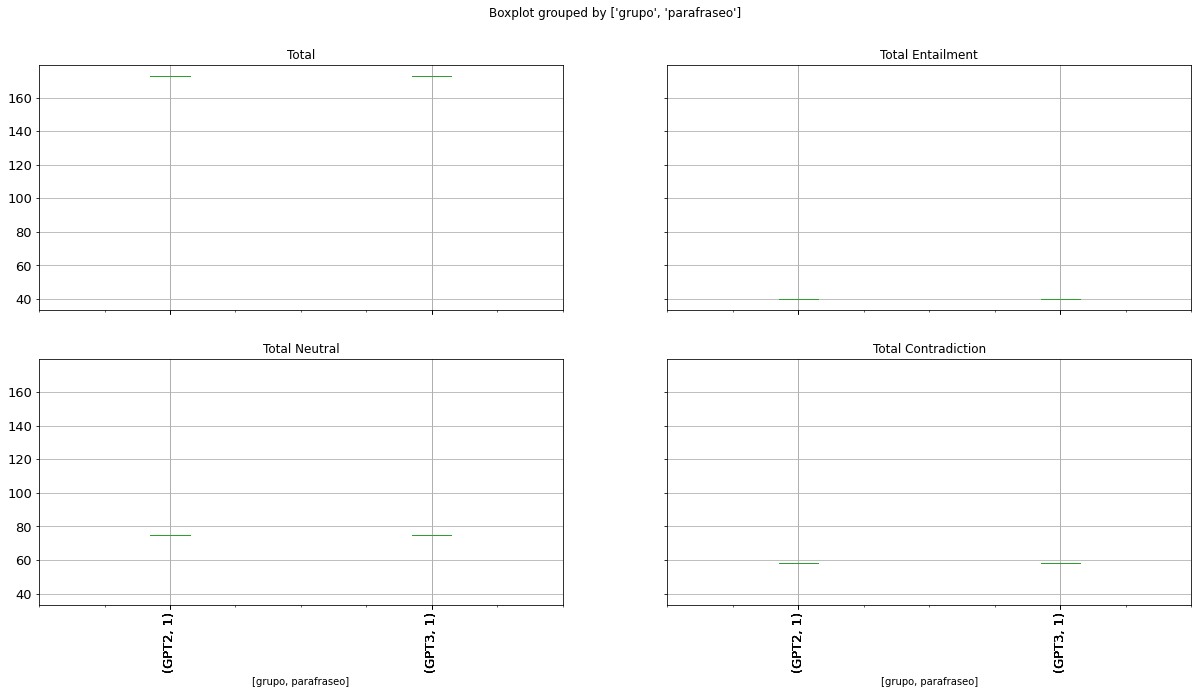

In [24]:
new_data.boxplot(column=['Total', 'Total Entailment','Total Neutral','Total Contradiction'],by=['grupo', 'parafraseo'],fontsize=13,figsize=(20,10),rot=90)
#new_data.boxplot()

array([[<AxesSubplot:title={'center':'Total Entailment'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Entailment (E)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Entailment (N)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Entailment (C)'}, xlabel='grupo'>]],
      dtype=object)

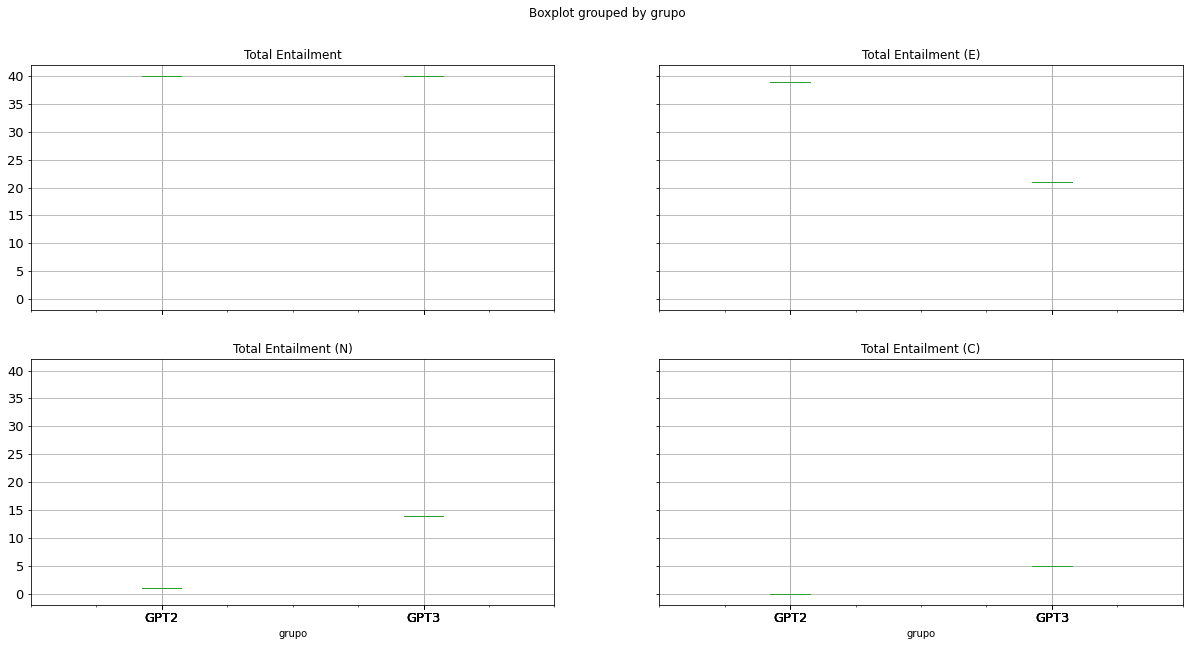

In [25]:
new_data.boxplot(column=['Total Entailment','Total Entailment (E)','Total Entailment (N)','Total Entailment (C)',],by='grupo',fontsize=13,figsize=(20,10))

array([[<AxesSubplot:title={'center':'Total Neutral'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Neutral (N)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Neutral (E)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Neutral (C)'}, xlabel='grupo'>]],
      dtype=object)

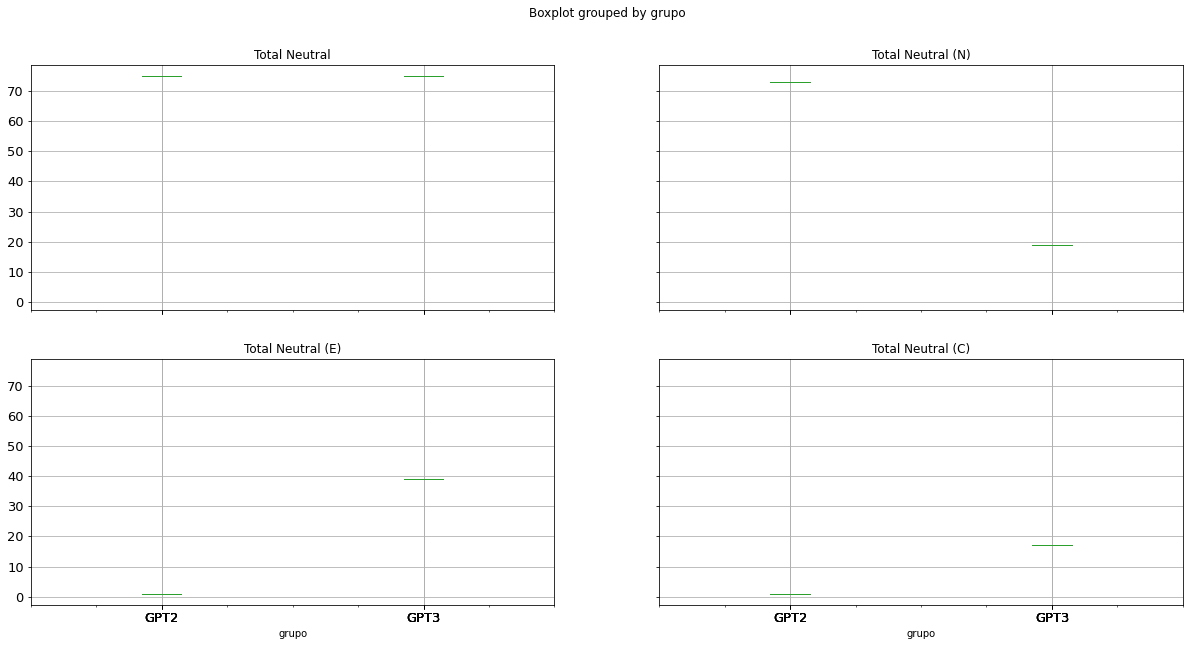

In [26]:
new_data.boxplot(column=['Total Neutral','Total Neutral (N)','Total Neutral (E)','Total Neutral (C)',],by='grupo',fontsize=13,figsize=(20,10))

<AxesSubplot:title={'center':'Total Contradiction'}, xlabel='grupo'>

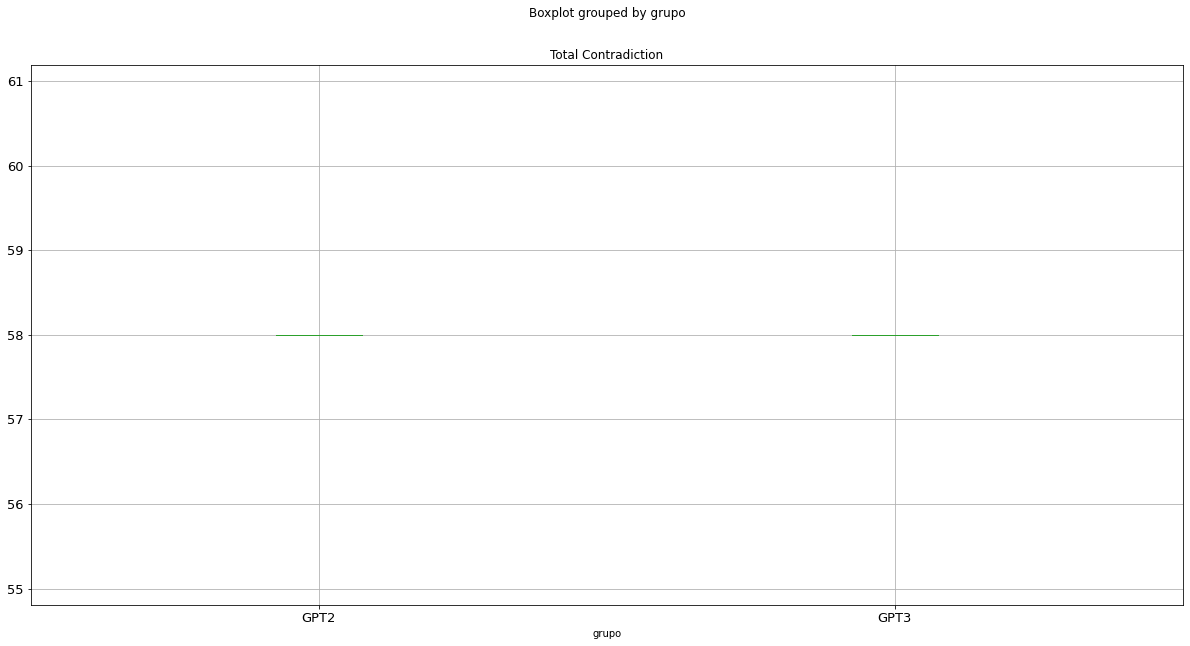

In [27]:
new_data.boxplot(column=['Total Contradiction'],by='grupo',fontsize=13,figsize=(20,10))

array([[<AxesSubplot:title={'center':'Total Contradiction'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Contradiction (C)'}, xlabel='grupo'>],
       [<AxesSubplot:title={'center':'Total Contradiction (E)'}, xlabel='grupo'>,
        <AxesSubplot:title={'center':'Total Contradiction (N)'}, xlabel='grupo'>]],
      dtype=object)

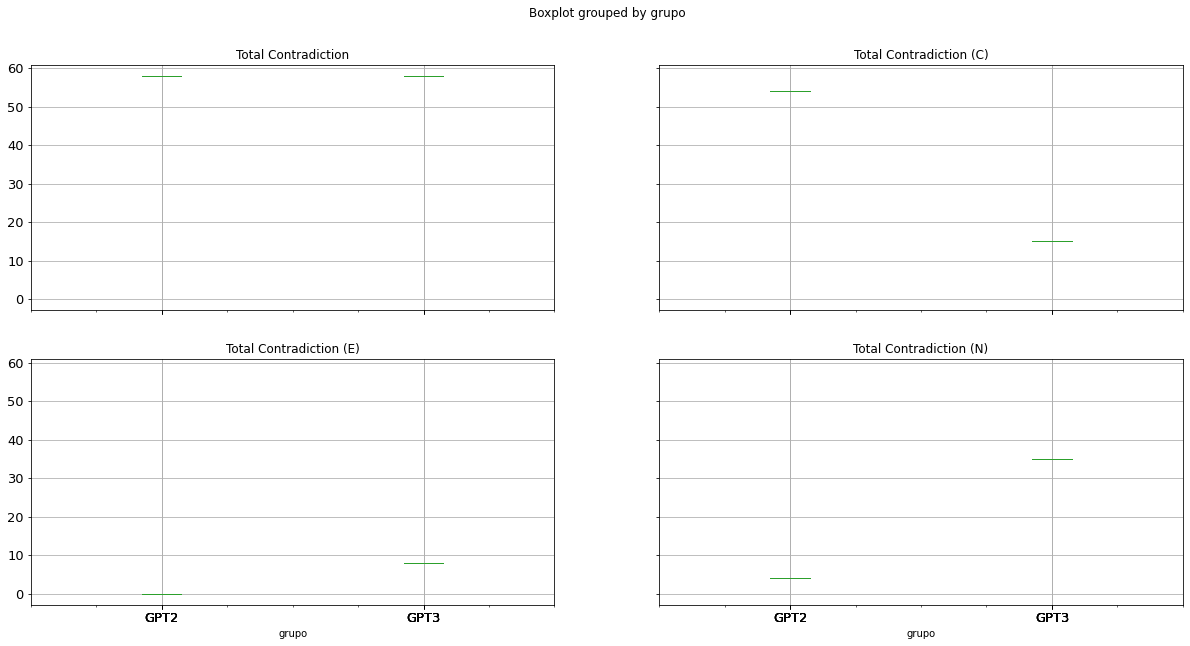

In [28]:
new_data.boxplot(column=['Total Contradiction','Total Contradiction (C)','Total Contradiction (E)','Total Contradiction (N)',],by='grupo',fontsize=13,figsize=(20,10))